In [366]:
from keras.applications import VGG19
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout,UpSampling2D
from keras.optimizers import Adam, RMSprop, SGD
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg19 import preprocess_input
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [367]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [368]:
# x_train = np.array([cv2.resize(x, (48,48), interpolation=cv2.INTER_AREA) for x in x_train])
# x_test = np.array([cv2.resize(x, (48,48), interpolation=cv2.INTER_AREA) for x in x_test])

In [369]:
x_train_final = preprocess_input(x_train)
x_test_final = preprocess_input(x_test)

In [370]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [371]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [372]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [373]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_28 (Flatten)        (None, 512)               0         
                                                                 
 dense_56 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_28 (Dropout)        (None, 1024)              0         
                                                                 
 dense_57 (Dense)            (None, 10)                10250     
                                                                 
Total params: 20559946 (78.43 MB)
Trainable params: 20559946 (78.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [374]:
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [375]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3)

In [376]:
history = model.fit(x_train_final, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
625/625 [==============================] - 38s 51ms/step - loss: 1.4319 - accuracy: 0.5047 - val_loss: 0.8876 - val_accuracy: 0.6944
Epoch 2/10
625/625 [==============================] - 30s 48ms/step - loss: 0.8458 - accuracy: 0.7111 - val_loss: 0.7540 - val_accuracy: 0.7410
Epoch 3/10
625/625 [==============================] - 31s 50ms/step - loss: 0.7013 - accuracy: 0.7635 - val_loss: 0.6612 - val_accuracy: 0.7728
Epoch 4/10
625/625 [==============================] - 31s 50ms/step - loss: 0.6132 - accuracy: 0.7913 - val_loss: 0.6260 - val_accuracy: 0.7846
Epoch 5/10
625/625 [==============================] - 31s 49ms/step - loss: 0.5454 - accuracy: 0.8126 - val_loss: 0.6012 - val_accuracy: 0.7959
Epoch 6/10
625/625 [==============================] - 31s 50ms/step - loss: 0.4917 - accuracy: 0.8323 - val_loss: 0.5860 - val_accuracy: 0.8016
Epoch 7/10
625/625 [==============================] - 31s 50ms/step - loss: 0.4462 - accuracy: 0.8476 - val_loss: 0.5775 - val_accuracy:

In [383]:
test_loss, test_acc = model.evaluate(x_test_final, y_test)
test_acc = test_acc * 100
print(f'Accuracy on test data: {round(test_acc,2)}')
print(f'Loss on test data: {test_loss}')

313/313 [==============================] - 4s 13ms/step - loss: 0.5782 - accuracy: 0.8152
Accuracy on test data: 81.52
Loss on test data: 0.578239917755127


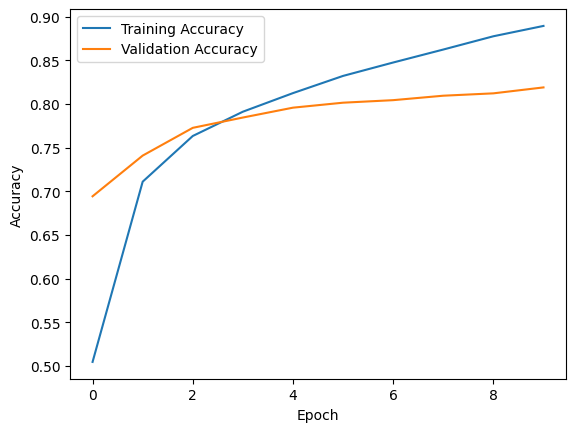

In [378]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

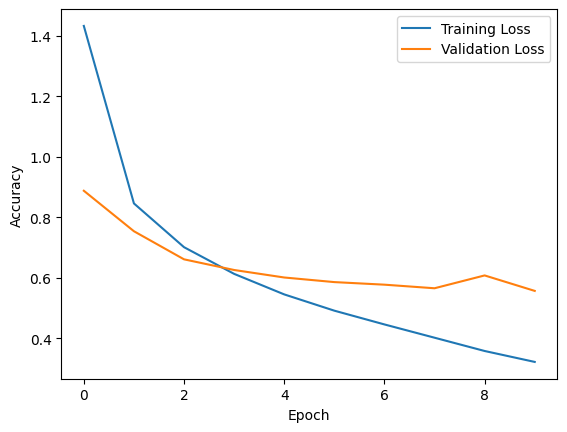

In [379]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [382]:
y_pred = model.predict(x_test_final)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 10ms/step


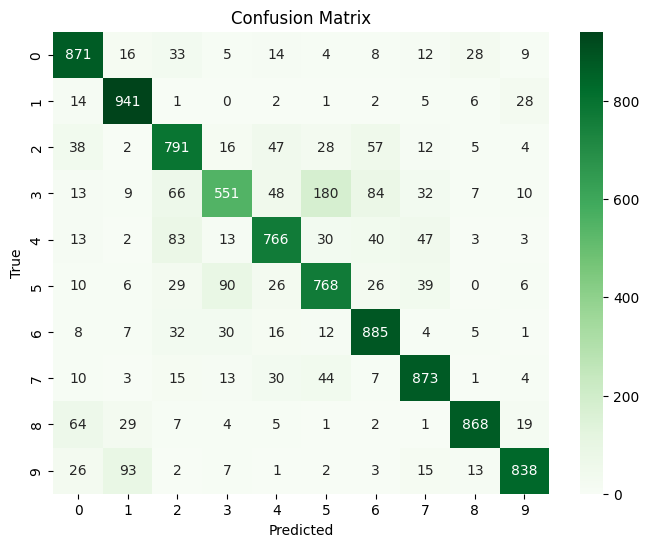

In [381]:
cm = confusion_matrix(true_labels, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()